### Look at the percentage of children's animated movies that do well according to our standards. 
(3x for worldwide gross and 2x for domestic gross)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns
sns.set(style = 'darkgrid')
%matplotlib inline

In [2]:
df = pd.read_csv('../data/profit_data.csv')

pd.options.display.max_columns = None
pd.options.display.max_rows = None


#### For adventure, action, and animation: the lowest rating (children appropriate movies) were all stacked up to see how often they succeed to gross beyond the bar we set

(3x for worldwide gross and 2x for domestic gross)

In [26]:
#Finding the intersection of the genre and the ratings

child_advent_df = df[(df['new_genre'] == 'Adventure') & ((df['MPAA'] == 'G') | (df['MPAA'] == 'PG') | (df['MPAA'] == 'PG-13'))].copy()
child_action_df = df[(df['new_genre'] == 'Action') & ((df['MPAA'] == 'G') | (df['MPAA'] == 'PG') | (df['MPAA'] == 'PG-13'))].copy()
child_ani_df = df[(df['new_genre'] == 'Animation') & ((df['MPAA'] == 'G') | (df['MPAA'] == 'PG') | (df['MPAA'] == 'PG-13'))].copy()

# the .copy() was added because pandas was repeatedly giving a warning. So in order to bypass it, I made them copies which essentially
# making it a snapshot of df so that even when df changes the new dataframes do not

child_advent_df.head()

,Unnamed: 0,popularity,vote_count,id_x,adult,original_language,title,vote_average,overview,MPAA,year,month,studio,production_budget,domestic_gross,worldwide_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres,avg_rating_imdb,num_votes_imdb,actors,directors,producers,editors,writers,primary_genre,secondary_genre,new_genre,worldwide_gross_z,domestic_gross_z
7,9,20.874,3940,10140,False,en,the chronicles of narnia: the voyage of the da...,6.4,"This time around Edmund and Lucy Pevensie, alo...",PG,2010,12,Fox,155.0,104.39,418.19,tt0980970,the chronicles of narnia: the voyage of the da...,The Chronicles of Narnia: The Voyage of the Da...,2010,113.0,"Adventure,Family,Fantasy",6.3,129663,"Georgie Henley,Ben Barnes,Will Poulter,Skandar...",Michael Apted,Andrew Adamson,NaN,"Christopher Markus,Stephen McFeely,Michael Pet...",Adventure,Family,Adventure,0.988941,0.388952
17,21,26.884,10292,12155,False,en,alice in wonderland,6.6,"Alice, an unpretentious and individual 19-year...",PG,2010,3,NaN,200.0,334.19,1025.49,tt1014759,alice in wonderland,Alice in Wonderland,2010,108.0,"Adventure,Family,Fantasy",6.5,358813,"Anne Hathaway,Johnny Depp,Mia Wasikowska,Helen...",Tim Burton,"Jennifer Todd,Suzanne Todd,Joe Roth",NaN,"Linda Woolverton,Lewis Carroll",Adventure,Family,Adventure,3.442301,2.965811
46,57,27.859,6082,24021,False,en,the twilight saga: eclipse,6.1,Bella once again finds herself surrounded by d...,PG-13,2010,6,Sum.,68.0,300.53,706.10,tt1325004,the twilight saga: eclipse,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy",5.0,211733,"Kristen Stewart,Robert Pattinson,Xavier Samuel...",David Slade,"Wyck Godfrey,Karen Rosenfelt",NaN,"Melissa Rosenberg,Stephenie Meyer",Adventure,Drama,Adventure,2.152035,2.588365
66,84,28.948,5220,32657,False,en,percy jackson & the olympians: the lightning t...,6.2,"Accident prone teenager, Percy discovers he's ...",PG,2010,2,Fox,95.0,88.77,223.05,tt0814255,percy jackson & the olympians: the lightning t...,Percy Jackson & the Olympians: The Lightning T...,2010,118.0,"Adventure,Family,Fantasy",5.9,165108,"Logan Lerman,Steve Coogan,Brandon T. Jackson,K...",Chris Columbus,"Karen Rosenfelt,Michael Barnathan,Mark Radcliffe",NaN,"Craig Titley,Rick Riordan",Adventure,Family,Adventure,0.200618,0.213798
79,105,15.657,2064,37056,False,en,letters to juliet,6.9,An American girl on vacation in Italy finds an...,PG,2010,5,Sum.,30.0,53.03,82.15,tt0892318,letters to juliet,Letters to Juliet,2010,105.0,"Adventure,Comedy,Drama",6.6,86137,"Gael García Bernal,Vanessa Redgrave,Amanda Sey...",Gary Winick,"Ellen Barkin,Mark Canton,Caroline Kaplan",NaN,"Jose Rivera,Tim Sullivan",Adventure,Comedy,Adventure,-0.368587,-0.186972


In [32]:
# find the worldwide gross = 3x production budget

child_advent_df['wld_three'] = (child_advent_df['worldwide_gross']) >= (3 * child_advent_df['production_budget'])
child_ani_df['wld_three'] = child_ani_df['worldwide_gross'] >= 3*child_ani_df.production_budget
child_action_df['wld_three'] = child_action_df['worldwide_gross'] >= 3*child_action_df.production_budget



child_advent = child_advent_df['wld_three'].value_counts(normalize = True)
child_action = child_action_df['wld_three'].value_counts(normalize = True)
child_ani = child_ani_df['wld_three'].value_counts(normalize = True)

In [38]:
ls_wld = [child_advent[True],child_action[True],child_ani[True]]

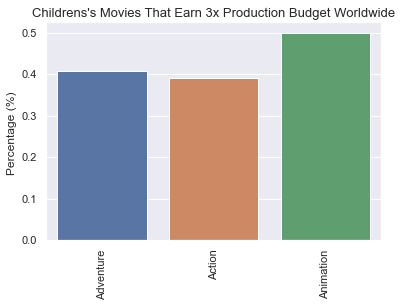

In [50]:
Y = ls_wld
X = ['Adventure','Action','Animation']

sns.barplot(X, Y)
plt.title("Childrens's Movies That Earn 3x Production Budget Worldwide", fontsize = 13)
plt.ylabel("Percentage (%) ")
plt.xticks(rotation = 90)

plt.show()

In [43]:
# finding the domestic gross = 2x production budget

child_advent_df['dom_twice'] = (child_advent_df['worldwide_gross']) >= (2 * child_advent_df['production_budget'])
child_ani_df['dom_twice'] = child_ani_df['worldwide_gross'] >= 2*child_ani_df.production_budget
child_action_df['dom_twice'] = child_action_df['worldwide_gross'] >= 2*child_action_df.production_budget



child_advent = child_advent_df['dom_twice'].value_counts(normalize = True)
child_action = child_action_df['dom_twice'].value_counts(normalize = True)
child_ani = child_ani_df['dom_twice'].value_counts(normalize = True)

In [44]:
ls_dom = [child_advent[True],child_action[True],child_ani[True]]

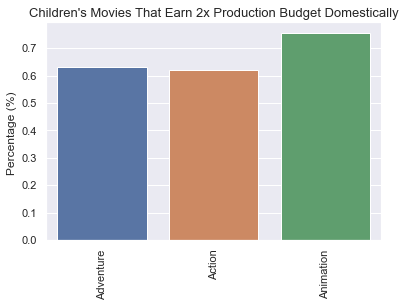

In [51]:
Y = ls_dom
X = ['Adventure','Action','Animation']

sns.barplot(X, Y)
plt.title("Children's Movies That Earn 2x Production Budget Domestically", fontsize = 13)
plt.ylabel("Percentage (%) ")
plt.xticks(rotation = 90)

plt.show()